In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the csv
meta_data = pd.read_csv("../dataset/alarm_metadata.csv")

meta_data.head()

,fname,fold,classID,class
0,1_danger_alarm_0.wav,1,1,danger_alarm
1,1_danger_alarm_1.wav,1,1,danger_alarm
2,1_danger_alarm_2.wav,1,1,danger_alarm
3,1_danger_alarm_3.wav,1,1,danger_alarm
4,1_danger_alarm_4.wav,1,1,danger_alarm


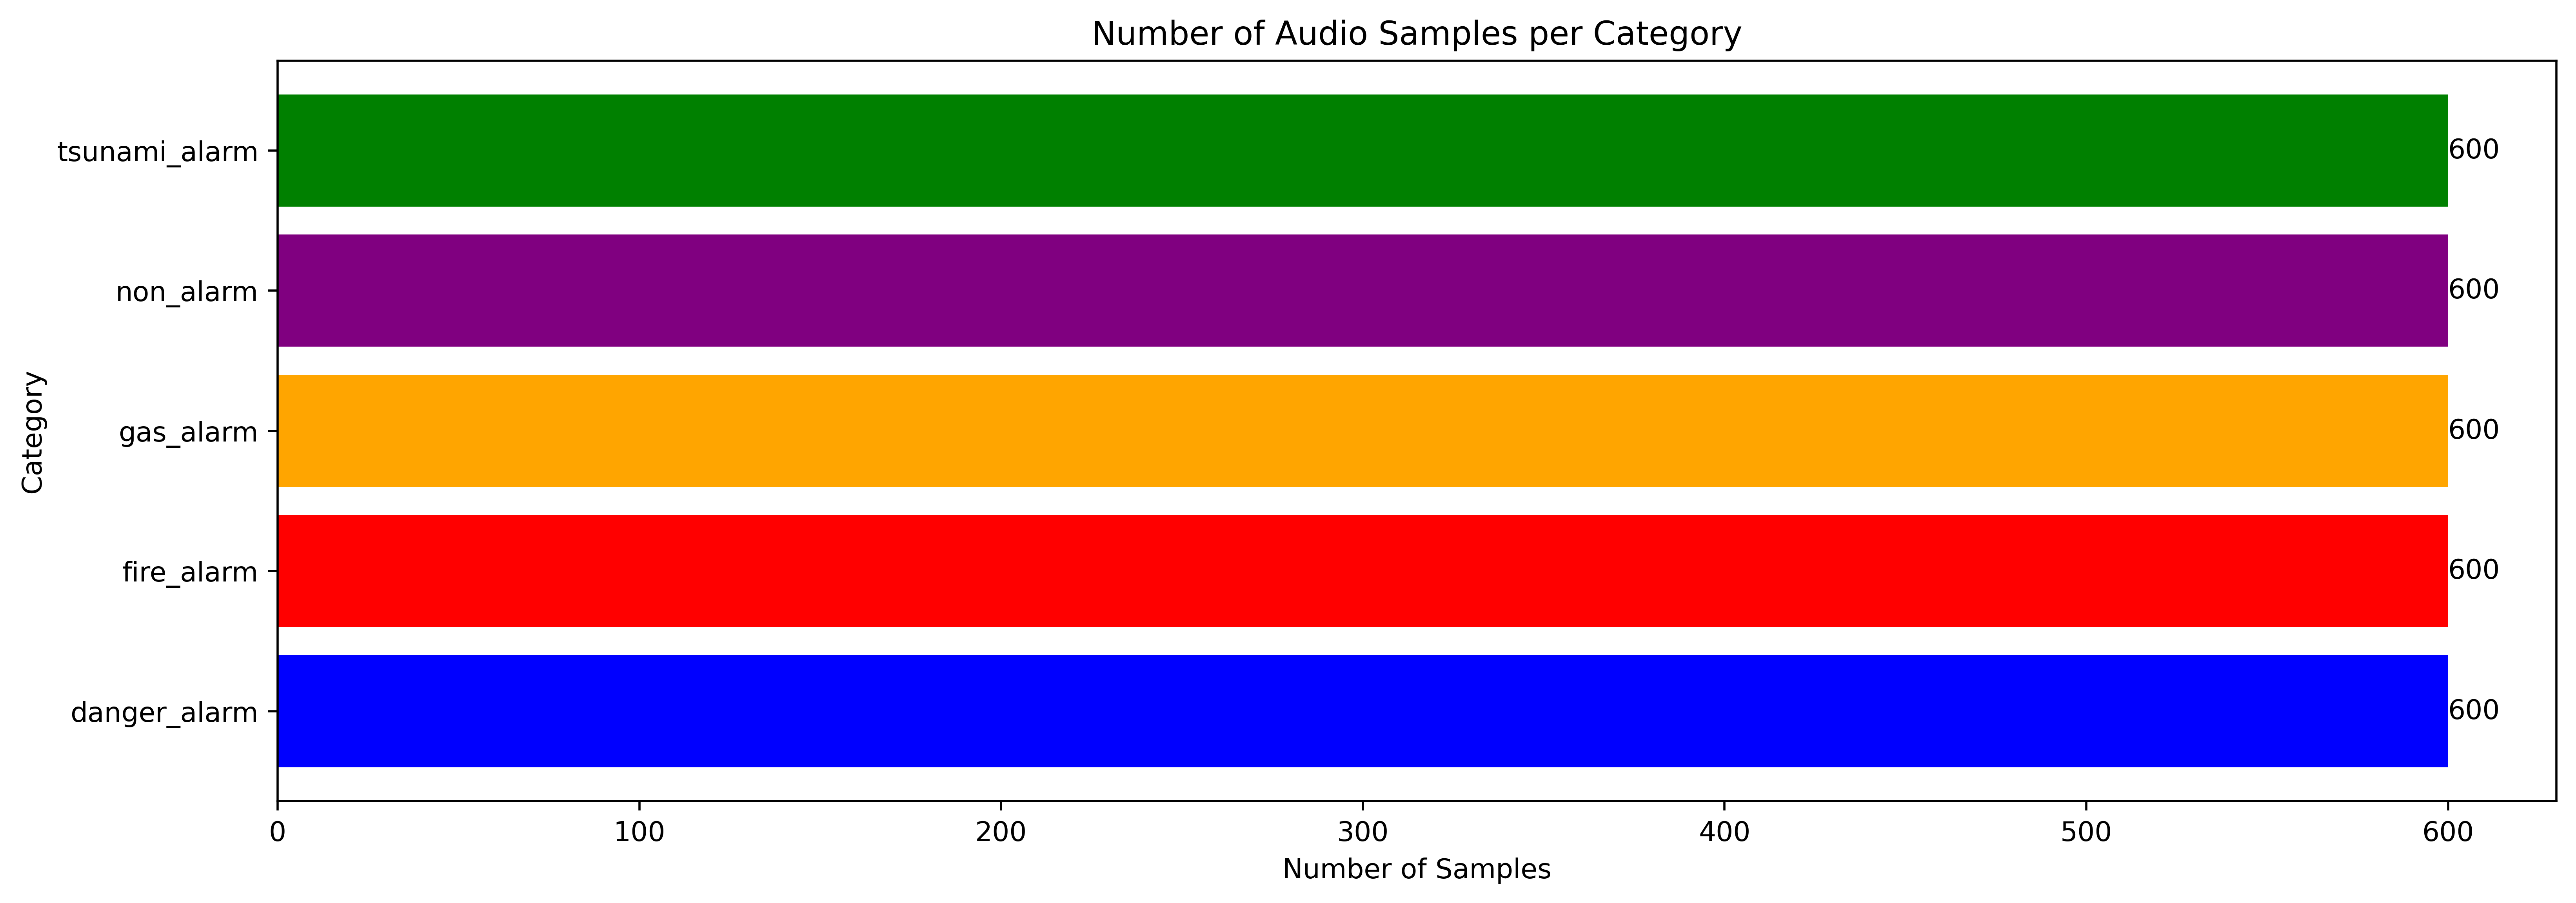

In [3]:
x = meta_data["class"].unique()
y = meta_data["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y, color=['blue', 'red', 'orange', 'purple', 'green'])
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.show()


In [4]:
danger_alarm = "../dataset/danger_alarm_1.wav"
fire_alarm = "../dataset/fire_alarm.wav"
gas_alarm = "../dataset/gas_alarm.wav"
non_alarm = "../dataset/non_alarm_1.wav"
tsunami_alarm = "../dataset/tsunami_alarm.wav"

# Importing the 5 files
y_danger, sr_danger = librosa.load(danger_alarm, sr=16000)
#audio_danger, _ = librosa.effects.trim(y_danger)

y_fire, sr_fire = librosa.load(fire_alarm, sr=16000)
#audio_fire, _ = librosa.effects.trim(y_fire)

y_gas, sr_gas = librosa.load(gas_alarm, sr=16000)
#audio_gas, _ = librosa.effects.trim(y_gas)

y_non, sr_non = librosa.load(non_alarm, sr=16000)
#audio_non, _ = librosa.effects.trim(y_non)

y_tsunami, sr_tsunami = librosa.load(tsunami_alarm, sr=16000)
#audio_tsunami, _ = librosa.effects.trim(y_tsunami)

In [5]:
# Alarm Danger
ipd.Audio(danger_alarm)

In [6]:
# Alarm Fire
ipd.Audio(fire_alarm)

In [7]:
# Alarm Gas
ipd.Audio(gas_alarm)

In [8]:
# Alarm non
ipd.Audio(non_alarm)

In [9]:
# Alarm Tsunami
ipd.Audio(tsunami_alarm)

## Plot Soundwave

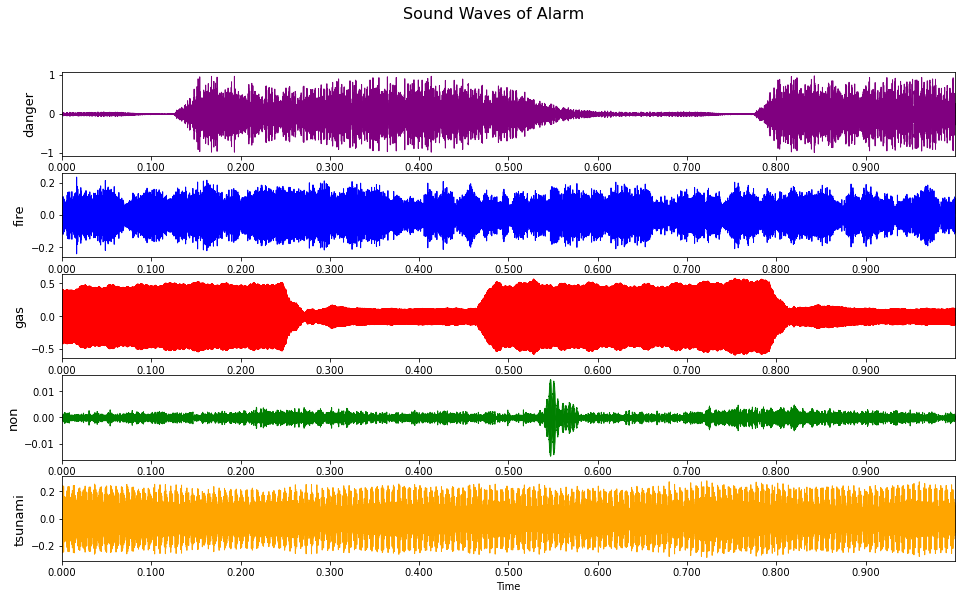

In [10]:
# plot sound wave

fig, ax = plt.subplots(5, figsize = (16, 9))
fig.suptitle('Sound Waves of Alarm', fontsize=16)

librosa.display.waveplot(y = y_danger, sr = sr_danger, color = "purple", ax=ax[0])
librosa.display.waveplot(y = y_fire, sr = sr_fire, color = "blue", ax=ax[1])
librosa.display.waveplot(y = y_gas, sr = sr_gas, color = "red", ax=ax[2])
librosa.display.waveplot(y = y_non, sr = sr_non, color = "green", ax=ax[3])
librosa.display.waveplot(y = y_tsunami, sr = sr_tsunami, color = "orange", ax=ax[4]);
audio_list = ['danger', 'fire', 'gas', 'non', 'tsunami']
for i, name in zip(range(5), audio_list):
    ax[i].set_ylabel(name, fontsize=13)

## Show Spectrum

In [11]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(10, 6))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)

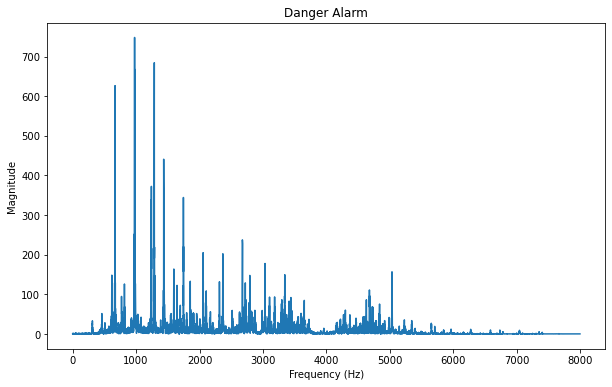

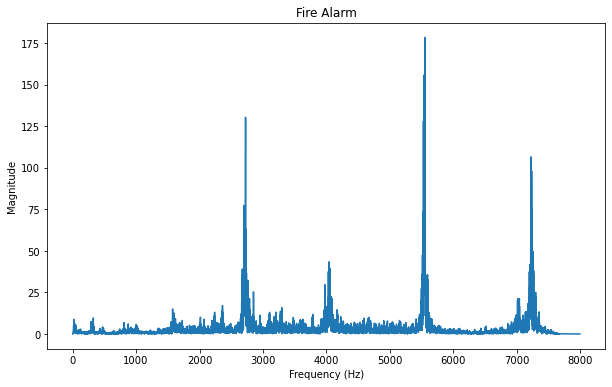

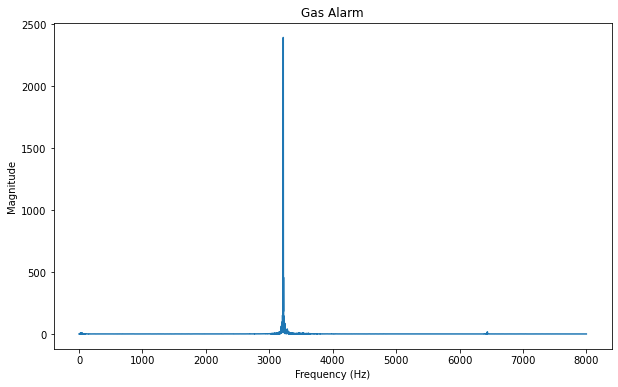

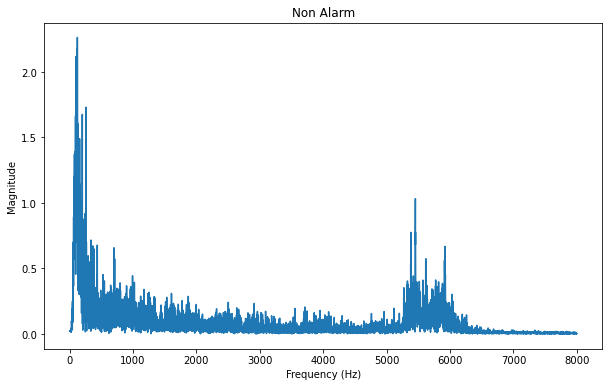

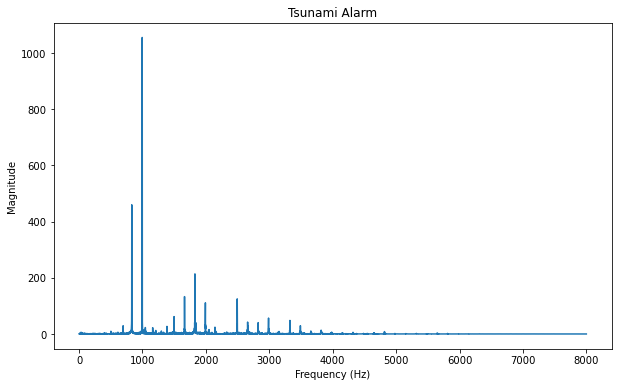

In [12]:
plot_magnitude_spectrum(y_danger, sr_danger, "Danger Alarm", 0.5)
plot_magnitude_spectrum(y_fire, sr_fire, "Fire Alarm", 0.5)
plot_magnitude_spectrum(y_gas, sr_gas, "Gas Alarm", 0.5)
plot_magnitude_spectrum(y_non, sr_non, "Non Alarm", 0.5)
plot_magnitude_spectrum(y_tsunami, sr_tsunami, "Tsunami Alarm", 0.5)

## plot spectrogram

In [13]:
f_s= 16000

# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft = int(0.032*f_s)      #frame_length  = 32ms

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=int(0.032*f_s)   #frame_stride = 16ms

# Specify the window type for FFT/STFT
window_type ='hann'

# Mel-bins
mel_bins = 40

In [14]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
#n_fft=int(0.032*f_s)         #32ms

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
#hop_length= int(0.016*f_s)   #16ms
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
#n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
#hop_length=320

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa_danger = np.abs(librosa.stft(y_danger, n_fft=n_fft, hop_length=hop_length, 
                                                 win_length=n_fft, window=window_type)) ** 2
spectrogram_librosa_fire = np.abs(librosa.stft(y_fire, n_fft=n_fft, hop_length=hop_length, 
                                               win_length=n_fft, window=window_type)) ** 2
spectrogram_librosa_gas = np.abs(librosa.stft(y_gas, n_fft=n_fft, hop_length=hop_length, 
                                              win_length=n_fft, window=window_type)) ** 2
spectrogram_librosa_non = np.abs(librosa.stft(y_non, n_fft=n_fft, hop_length=hop_length, 
                                              win_length=n_fft, window=window_type)) ** 2
spectrogram_librosa_tsunami = np.abs(librosa.stft(y_tsunami, n_fft=n_fft, hop_length=hop_length, 
                                                  win_length=n_fft, window=window_type)) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa_danger.shape)
print("The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")
print("The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.")

The shape of spectrogram_librosa is:  (257, 32)
The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])
The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft 512  samples
The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.


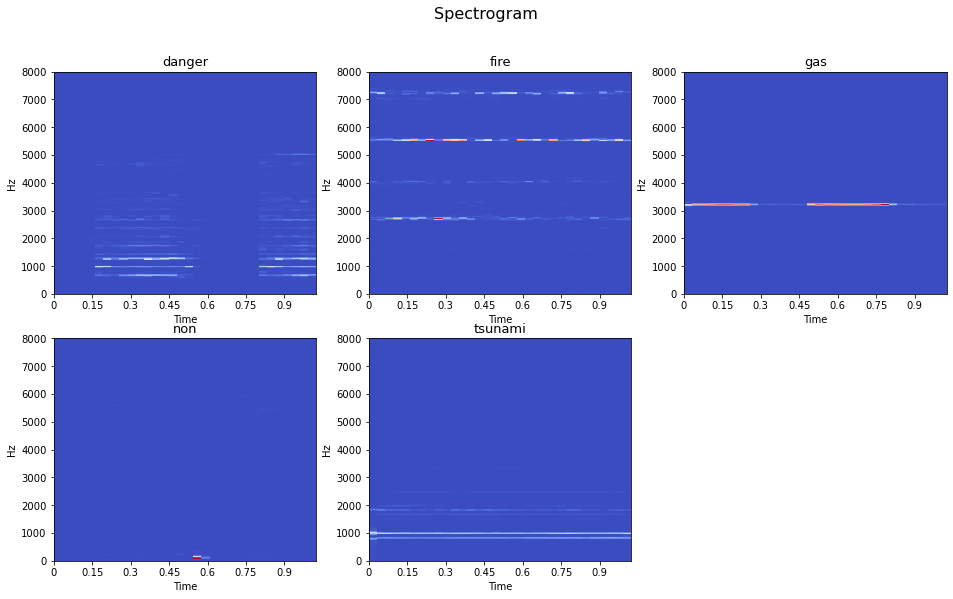

In [15]:

# === PLOT ===
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Spectrogram', fontsize=16)
fig.delaxes(ax[1, 2])

#display the spectrogram
img = librosa.display.specshow(spectrogram_librosa_danger, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm', ax=ax[0, 0])
librosa.display.specshow(spectrogram_librosa_fire, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[0, 1])
librosa.display.specshow(spectrogram_librosa_gas, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[0, 2])
librosa.display.specshow(spectrogram_librosa_non, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[1, 0])
librosa.display.specshow(spectrogram_librosa_tsunami, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[1, 1])
#fig.colorbar(img, ax=ax, format="%+2.f dB")
for i, name in zip(range(0, 2*3), audio_list):
    x = i // 3
    y = i % 3
    ax[x, y].set_title(name, fontsize=13)


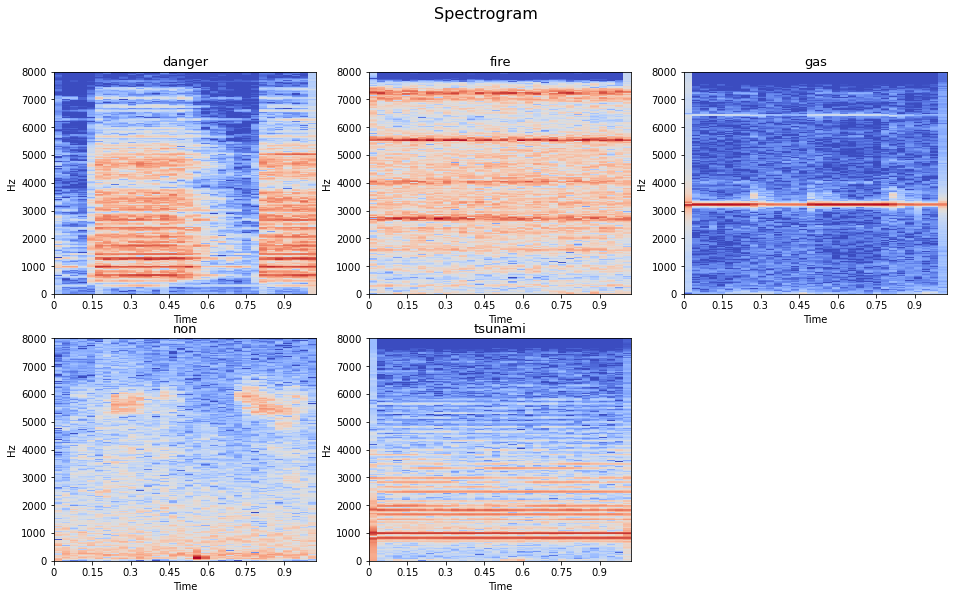

In [16]:
# === PLOT ===
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Spectrogram', fontsize=16)
fig.delaxes(ax[1, 2])

#spectrogram
spectrogram_db_danger = librosa.power_to_db(spectrogram_librosa_danger, ref=np.max)
spectrogram_db_fire = librosa.power_to_db(spectrogram_librosa_fire, ref=np.max)
spectrogram_db_gas = librosa.power_to_db(spectrogram_librosa_gas, ref=np.max)
spectrogram_db_non = librosa.power_to_db(spectrogram_librosa_non, ref=np.max)
spectrogram_db_tsunami = librosa.power_to_db(spectrogram_librosa_tsunami, ref=np.max)

#display the spectrogram
img = librosa.display.specshow(spectrogram_db_danger, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm', ax=ax[0, 0])
librosa.display.specshow(spectrogram_db_fire, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[0, 1])
librosa.display.specshow(spectrogram_db_gas, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[0, 2])
librosa.display.specshow(spectrogram_db_non, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[1, 0])
librosa.display.specshow(spectrogram_db_tsunami, sr=sr_danger, x_axis = 'time',
                         y_axis='linear',hop_length=hop_length, cmap = 'coolwarm',ax=ax[1, 1])

# fig.colorbar(img, ax=ax, format="%+2.f dB")

for i, name in zip(range(0, 2*3), audio_list):
    x = i // 3
    y = i % 3
    ax[x, y].set_title(name, fontsize=13)

## Mel Scale

<h4><b>Transform the spectrogram output to a logarithmic scale by transforming the amplitude to decibels and frequency to a mel scale

Reference: 
https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505 

https://docs.nvidia.com/deeplearning/dali/user-guide/docs/examples/audio_processing/spectrogram.html

The change of scale is done so that we can actually get a spectrogram from which we can visually infer some meaningful information. The spectrogram above is hard to read as our hearing range is limited to a small set of frequecies and amplitudes.

How humans perceive amplitude of a sound? Humans perceive amplitude of a sound as its loudness. We hear loudness logarithmically rather than linearly. This is accounted for with a Decibel scale. 0dB is silence. 10 dB is 10 times louder than 0 dB, 20 dB is 100 times louder and 30 dB is 1000 times louder and so on . .

How humans perceive the frequencies in a sound? We as humans perceive perceive frequrncies on a logarithmic scale, rather than a linear scale. . . Meaning we can easily tell the differences between lower frequencies (such as between 100Hz and 200Hz) but we can hardly tell the differences between higher frequencies (such as 10000Hz and 100100Hz). In both cases, the difference in frequency is 100Hz but to a human ear 200Hz appears farther apart than 100Hz. However, looking at it differently, in the 100Hz-200Hz pair, the second frequency is double the first frequency, whereas in the 10000Hz-100100Hz pair, the second frequency is only 1% more than the first one. Therfore, we can say that we hear them on a logarithmic scale rather than a linear scale. This gave rise to a Mel scale.

Therfore, it is important for us to use a logarithmic scale via the Mel Scale (for frequency) and the Decibel scale (for amplitude) when dealing with Frequencies and Amplitudes for an audio input.

Text(0, 0.5, 'Mel Scale')

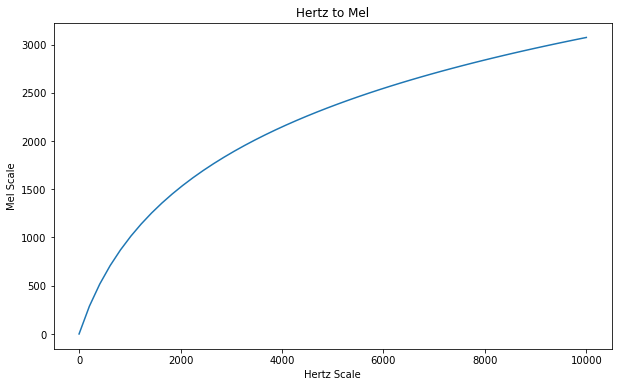

In [17]:
import math
# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

# Plotting the figure:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel')
plt.xlabel('Hertz Scale')
plt.ylabel('Mel Scale')

Text(0.5, 0, 'Frequency(Hz)')

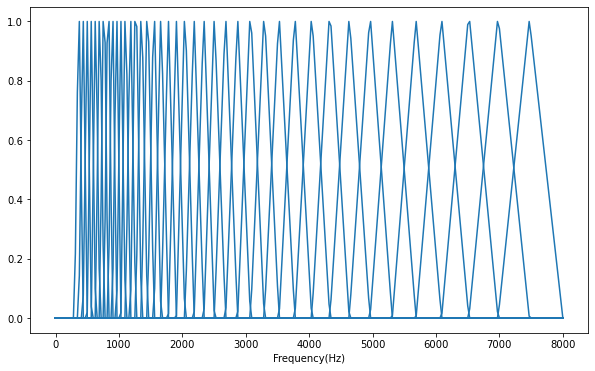

In [18]:
# Filterbanks Triangle
f_s=16000
filterbanks = librosa.filters.mel(sr=f_s, n_fft=n_fft, n_mels=40, fmin=300, fmax=None)
filterbanks /= np.max(filterbanks, axis=-1)[:, None]
f = np.arange(filterbanks.T.shape[0])/n_fft*f_s
plt.figure(figsize=(10,6))
plt.plot(f, filterbanks.T, "-", c="tab:blue")
plt.xlabel('Frequency(Hz)')

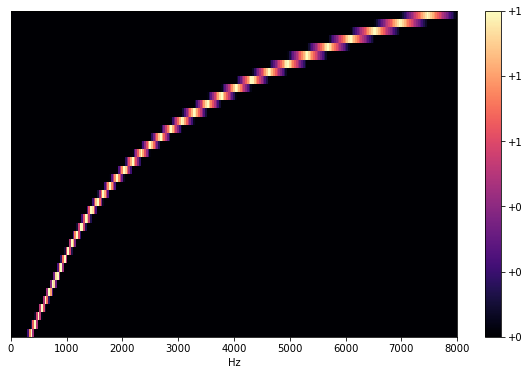

In [19]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(filterbanks, 
                         sr=f_s, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

512
256
(40, 63)


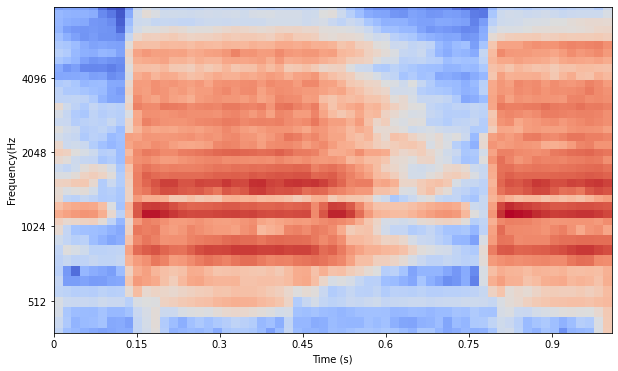

In [20]:
# mel-scale spectrogram
n_fft = int(0.032*f_s)  #frame length = 32ms
hop_length = int(0.016*f_s) #frame stride = 16 ms
print(n_fft)
print(hop_length)
mel_spec = librosa.feature.melspectrogram(y_danger, 
                                          sr=sr_danger,
                                          n_mels=40,
                                          n_fft=n_fft,
                                          hop_length=hop_length)
log_mel_spec = np.log(mel_spec)

#plot log-mel spectrogram (also called "Mel Filterbanks")
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.specshow(log_mel_spec, 
                         sr=sr_danger,
                         hop_length=hop_length,
                         y_axis="mel",
                         x_axis="time",
                         ax=ax,
                         fmin=300,
                         fmax=8000)
plt.ylabel("Frequency(Hz")
plt.xlabel("Time (s)")

print(mel_spec.shape)


## Mel Spectrogram

In [21]:
f_s = 16000
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
win_length=int(0.02*f_s)         #32ms
n_fft = 256
# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length= int(0.01*f_s)   #16ms

In [22]:
n_fft

256

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

The mel scale is a non-linear transformation of frequency scale based on the perception of pitches. The mel scale is calculated so that two pairs of frequencies separated by a delta in the mel scale are perceived by humans as being equidistant.

In machine learning applications involving speech and audio, we typically want to represent the power spectrogram in the mel scale domain. We do that by applying a bank of overlapping triangular filters (called mel filter bank) that compute the energy of the spectrum in each band.

The shape of the Mel spectrogram is [number of mel bands x (frame_size/2) + 1, where frame_size is the number of FFT components (n_fft)

In [23]:
Mel_spectrogram_danger = librosa.feature.melspectrogram(y=y_danger, sr=sr_danger, n_fft=n_fft, 
                                                        hop_length=hop_length, win_length=n_fft, 
                                                        window=window_type, n_mels = mel_bins, 
                                                        power=2.0)
Mel_spectrogram_fire = librosa.feature.melspectrogram(y=y_fire, sr=sr_fire, n_fft=n_fft, 
                                                        hop_length=hop_length, win_length=n_fft, 
                                                        window=window_type, n_mels = mel_bins, 
                                                        power=2.0)
Mel_spectrogram_gas = librosa.feature.melspectrogram(y=y_gas, sr=sr_gas, n_fft=n_fft, 
                                                        hop_length=hop_length, win_length=n_fft, 
                                                        window=window_type, n_mels = mel_bins, 
                                                        power=2.0)
Mel_spectrogram_non = librosa.feature.melspectrogram(y=y_non, sr=sr_non, n_fft=n_fft, 
                                                        hop_length=hop_length, win_length=n_fft, 
                                                        window=window_type, n_mels = mel_bins, 
                                                        power=2.0)
Mel_spectrogram_tsunami = librosa.feature.melspectrogram(y=y_tsunami, sr=sr_tsunami, n_fft=n_fft, 
                                                        hop_length=hop_length, win_length=n_fft, 
                                                        window=window_type, n_mels = mel_bins, 
                                                        power=2.0)

In [24]:
print("The shape of mel spectrogram is: ", Mel_spectrogram_gas.shape)

The shape of mel spectrogram is:  (40, 101)


## Plot Log Mel Spectrogram


Move from power (mel) spectrum and apply log and move amplitude to a log scale (decibels). While doing so we will also normalize the spectrogram so that its maximum represent the 0 dB point.

https://stackoverflow.com/questions/52432731/store-the-spectrogram-as-image-in-python/52683474 - How to save the figure in the working directory.

https://stackoverflow.com/questions/56719138/how-can-i-save-a-librosa-spectrogram-plot-as-a-specific-sized-image/57204349#57204349 - if the desire is to save the data in the spectrogram (not the image itself)

In [25]:
mel_spectrogram_db_danger = librosa.power_to_db(Mel_spectrogram_danger, ref=np.max)
mel_spectrogram_db_fire = librosa.power_to_db(Mel_spectrogram_fire, ref=np.max)
mel_spectrogram_db_gas = librosa.power_to_db(Mel_spectrogram_gas, ref=np.max)
mel_spectrogram_db_non = librosa.power_to_db(Mel_spectrogram_non, ref=np.max)
mel_spectrogram_db_tsunami = librosa.power_to_db(Mel_spectrogram_tsunami, ref=np.max)

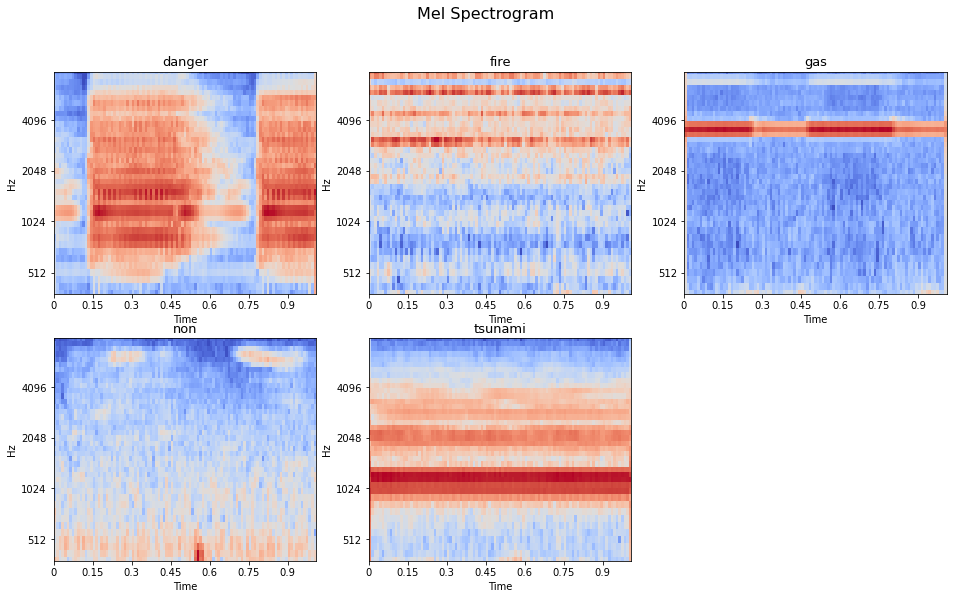

In [26]:
# === PLOT ===
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Mel Spectrogram', fontsize=16)
fig.delaxes(ax[1, 2])

librosa.display.specshow(mel_spectrogram_db_danger, sr=sr_danger, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=300, fmax=8000, ax=ax[0, 0])
librosa.display.specshow(mel_spectrogram_db_fire, sr=sr_fire, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=300, fmax=8000, ax=ax[0, 1])
librosa.display.specshow(mel_spectrogram_db_gas, sr=sr_gas, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=300, fmax=8000, ax=ax[0, 2])
librosa.display.specshow(mel_spectrogram_db_non, sr=sr_non, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=300, fmax=8000, ax=ax[1, 0])
librosa.display.specshow(mel_spectrogram_db_tsunami, sr=sr_tsunami, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=300, fmax=8000, ax=ax[1, 1])

#fig.colorbar(img, ax=ax, format="%+2.f dB")

for i, name in zip(range(0, 2*3), audio_list):
    x = i // 3
    y = i % 3
    ax[x, y].set_title(name, fontsize=13)

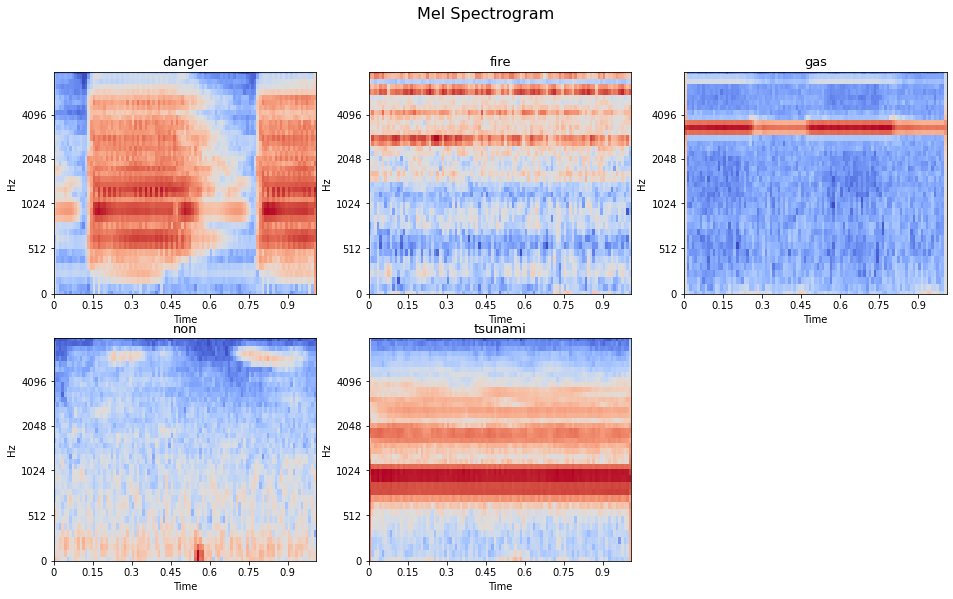

In [27]:
# === PLOT ===
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Mel Spectrogram', fontsize=16)
fig.delaxes(ax[1, 2])

librosa.display.specshow(mel_spectrogram_db_danger, sr=sr_danger, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=0, fmax=8000, ax=ax[0, 0])
librosa.display.specshow(mel_spectrogram_db_fire, sr=sr_fire, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=0, fmax=8000, ax=ax[0, 1])
librosa.display.specshow(mel_spectrogram_db_gas, sr=sr_gas, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=0, fmax=8000, ax=ax[0, 2])
librosa.display.specshow(mel_spectrogram_db_non, sr=sr_non, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=0, fmax=8000, ax=ax[1, 0])
librosa.display.specshow(mel_spectrogram_db_tsunami, sr=sr_tsunami, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap = 'coolwarm', fmin=0, fmax=8000, ax=ax[1, 1])

#fig.colorbar(img, ax=ax, format="%+2.f dB")

for i, name in zip(range(0, 2*3), audio_list):
    x = i // 3
    y = i % 3
    ax[x, y].set_title(name, fontsize=13)

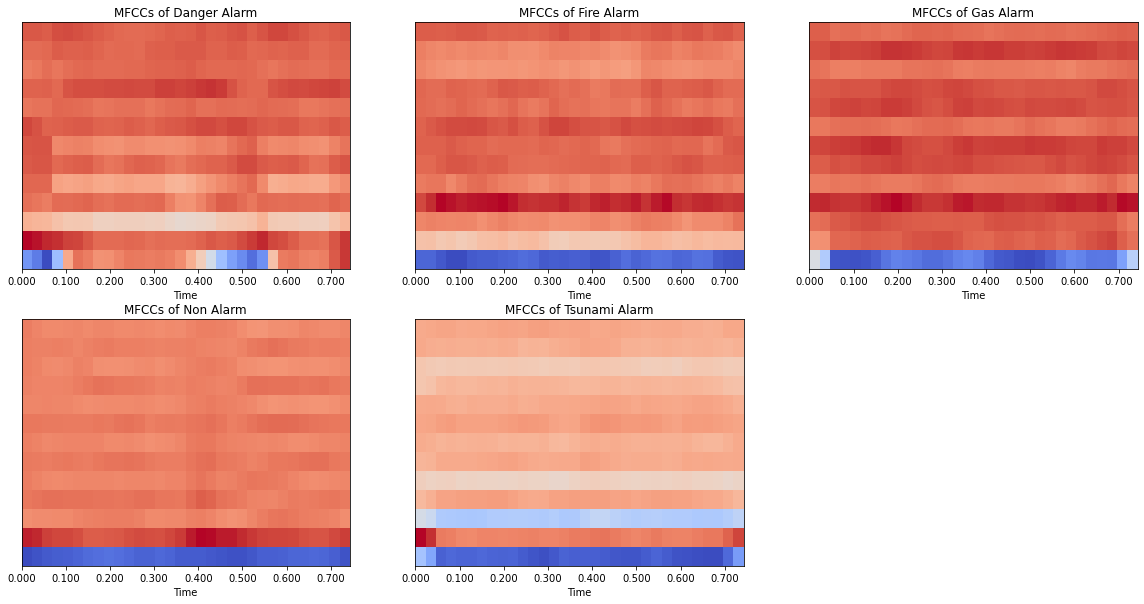

In [28]:
# Take MFCCs of sounds:
dMFCC = librosa.feature.mfcc(y_danger, sr=16000, n_mfcc=13)
fMFCC = librosa.feature.mfcc(y_fire, sr=16000, n_mfcc=13)
gMFCC = librosa.feature.mfcc(y_gas, sr=16000, n_mfcc=13)
nMFCC = librosa.feature.mfcc(y_non, sr=16000, n_mfcc=13)
tMFCC = librosa.feature.mfcc(y_tsunami, sr=16000, n_mfcc=13)

# Plot MFCCs
fig, ax = plt.subplots(2,3, figsize = (20,10))
fig.delaxes(ax[1, 2])
ax[0,0].set(title = 'MFCCs of Danger Alarm')
i = librosa.display.specshow(dMFCC, x_axis='time', ax=ax[0,0])
ax[0,1].set(title = 'MFCCs of Fire Alarm')
librosa.display.specshow(fMFCC, x_axis='time', ax=ax[0,1])
ax[0,2].set(title = 'MFCCs of Gas Alarm')
librosa.display.specshow(gMFCC,x_axis='time', ax=ax[0,2])
ax[1,0].set(title = 'MFCCs of Non Alarm')
librosa.display.specshow(nMFCC,x_axis='time', ax=ax[1,0])
ax[1,1].set(title = 'MFCCs of Tsunami Alarm')
librosa.display.specshow(tMFCC,x_axis='time', ax=ax[1,1])
# plt.colorbar(i)

In [27]:
## additional information

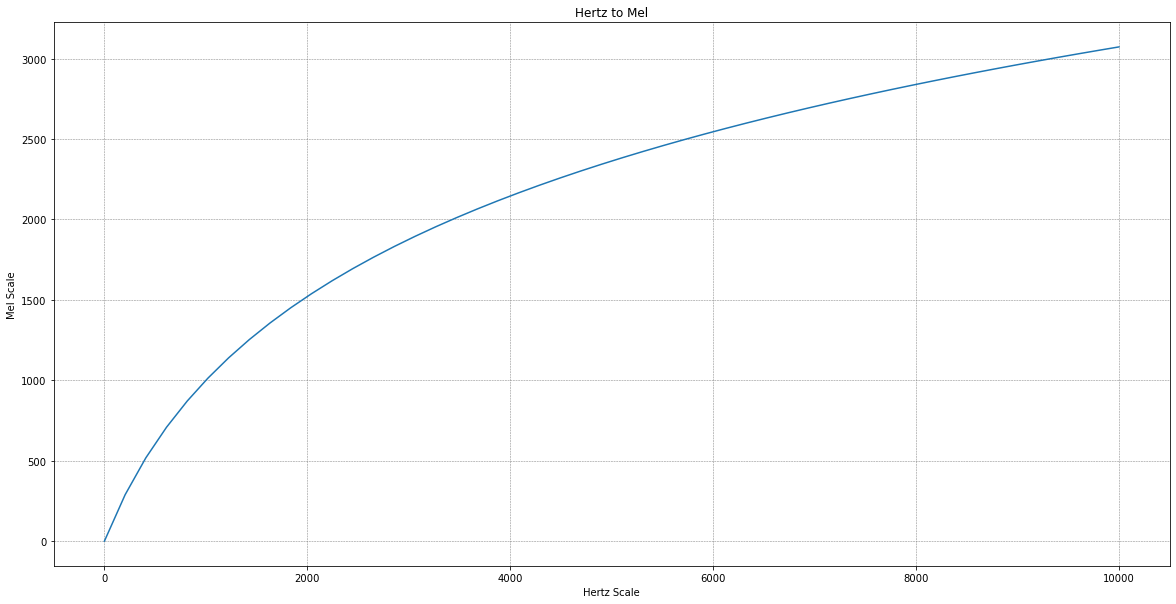

In [36]:
# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

# Plotting the figure:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel')
plt.xlabel('Hertz Scale')
plt.ylabel('Mel Scale')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

In [77]:
# Import necessary packages
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

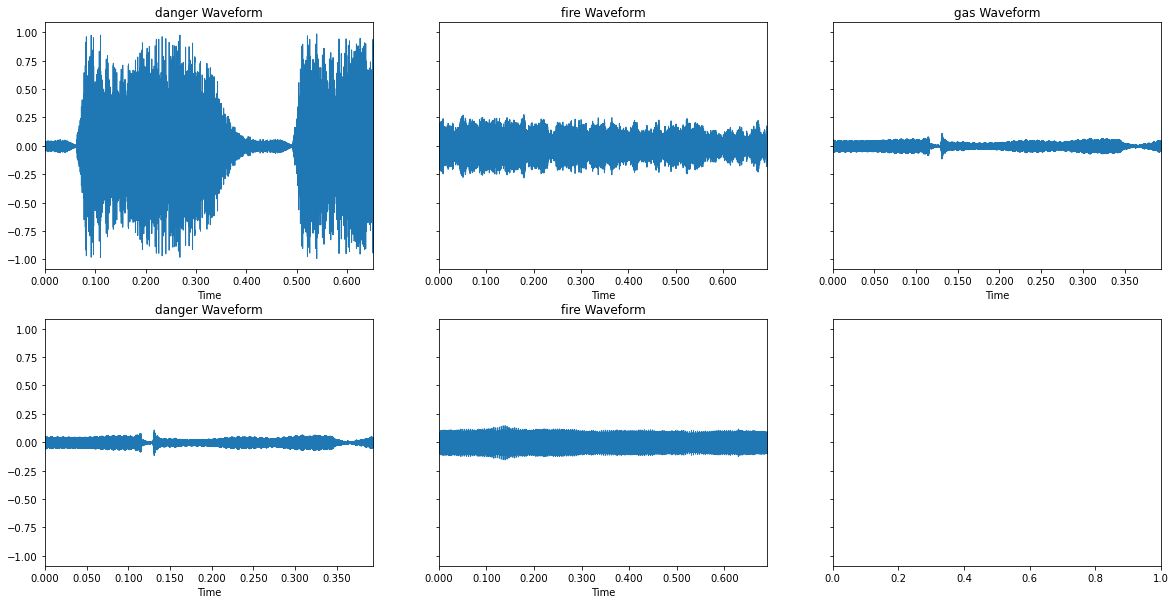

In [98]:
# Filter out dead noise
def trimmed(wav, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise boolean mask determination.
    mask = wav > threshold
    return wav[mask]
# Filter sounds
danger = trimmed(y_danger, 0.005)
fire = trimmed(y_fire, 0.005)
gas = trimmed(y_gas, 0.005)
non_alarm = trimmed(y_gas, 0.005)
tsunami = trimmed(y_tsunami, 0.005)
# Visualize wave forms
fig, ax = plt.subplots(2,3, figsize = (20,10), sharey = True)
fig.delaxes(ax[1, 2])
#fig.suptitle('Audio Waveform', fontsize=16)
#fig.delaxes(ax[1, 2])
librosa.display.waveplot(danger, sr=sr, ax=ax[0,0])
ax[0,0].set(title = 'danger Waveform')
librosa.display.waveplot(fire, sr=sr, ax=ax[0,1])
ax[0,1].set(title = 'fire Waveform')
librosa.display.waveplot(gas, sr=sr, ax=ax[0,2])
ax[0,2].set(title = 'gas Waveform')
librosa.display.waveplot(non_alarm, sr=sr, ax=ax[1,0])
ax[1,0].set(title = 'danger Waveform')
librosa.display.waveplot(tsunami, sr=sr, ax=ax[1,1])
ax[1,1].set(title = 'fire Waveform')
plt.show()

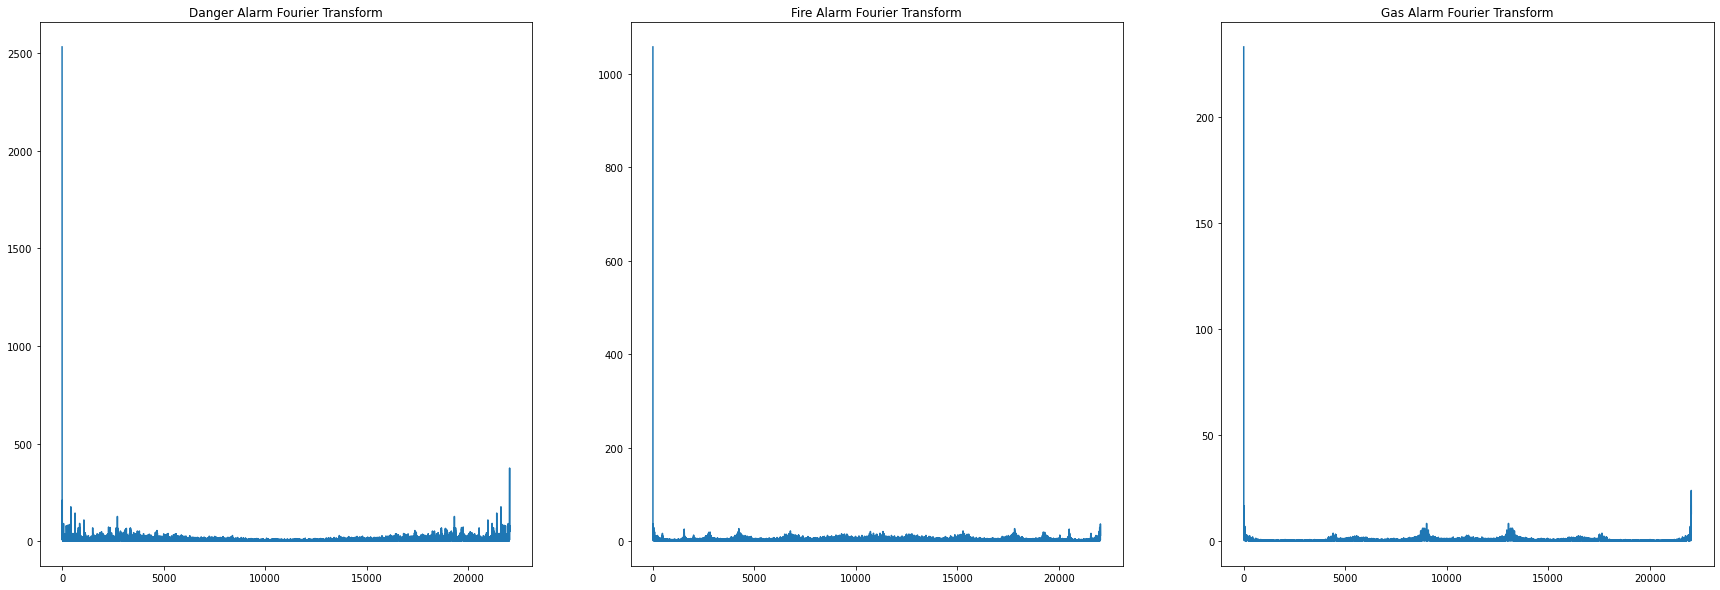

In [99]:
def fft_components(sound):
    # Find FFT
    fft = np.fft.fft(sound)
    # Find magnitude
    mag = np.abs(np.real(fft))
    # Find frequency
    freq = np.linspace(0,sr, len(mag))
    return mag, freq

# Using function from above to find components
danger_mag, danger_freq = fft_components(danger)
fire_mag, fire_freq = fft_components(fire)
gas_mag, gas_freq = fft_components(gas)

# Visualize the FFT
fig, ax = plt.subplots(1,3, figsize = (30,10))
# Plotting the guitar
ax[0].plot(danger_freq, danger_mag)
ax[0].set(title = 'Danger Alarm Fourier Transform')
# Plotting the kick drum
ax[1].plot(fire_freq, fire_mag)
ax[1].set(title = 'Fire Alarm Fourier Transform')
# Plotting the snare
ax[2].plot(gas_freq, gas_mag)
ax[2].set(title = 'Gas Alarm Fourier Transform')
plt.show()

In [110]:
def to_decibles(signal):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal

# Function to plot the converted audio signal
def plot_spec(D, sr, instrument):
    fig, ax = plt.subplots(figsize = (20,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + instrument)
    fig.colorbar(spec)

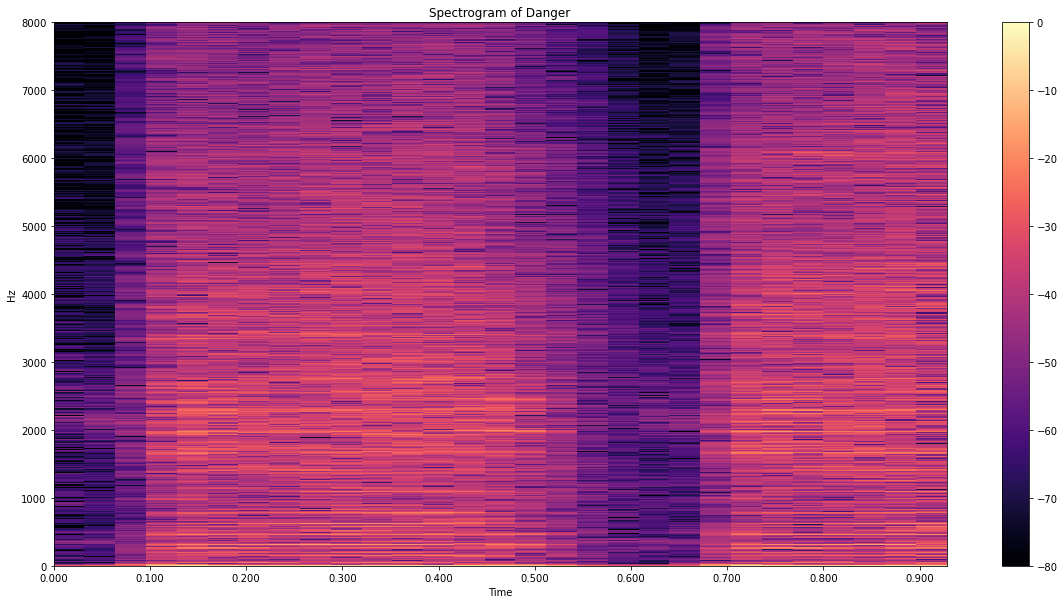

In [111]:
plot_spec(to_decibles(danger), sr_danger, 'Danger')